In [1]:
import ta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from utils import *
from sklearn.model_selection import train_test_split
import akshare as ak
from transformer import *
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [16]:
df_na  = get_data(symbol='106.TTE', start_date='20210101', end_date="20250330")
scaler = MinMaxScaler()
x_values = scaler.fit_transform(df_na.values)

/Users/wangxinyu/Documents/Msc(AI)_Courses/COMP7409/COMP7409_2025_Project/transformer.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['roc'] = ta.momentum.roc(close=df.close) # Rate of Change (ROC)
/Users/wangxinyu/Documents/Msc(AI)_Courses/COMP7409/COMP7409_2025_Project/transformer.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rsi'] = ta.momentum.rsi(close=df.close) # Relative Strength Index (RSI)
/Users/wangxinyu/Documents/Msc(AI)_Courses/COMP7409/COMP7409_2025_Project/transformer.py:30

In [17]:
TIMESTEP = 32
y_values = x_values[:,0]
x_values = x_values[:,1:]


def create_time_series_data(X, time_steps):
    X_t = []
    for i in range(len(X) - time_steps):
        X_t.append(X[i:i + time_steps])  # 时间步数据
        
    return np.array(X_t)

x_values = create_time_series_data(x_values , TIMESTEP)

X_train = x_values[:-60]
X_test = x_values[-60:]
y_train = y_values[TIMESTEP:-60]
y_test = y_values[-60:]
print(f"X shape: {X_train.shape, X_test.shape}")  
print(f"y shape: {y_train.shape, y_test.shape}")  


X shape: ((913, 32, 37), (60, 32, 37))
y shape: ((913,), (60,))


In [18]:
# 创建模型
input_shape = (TIMESTEP, 37)  # 时间步和特征数
model = create_model(input_shape)
# 训练模型
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=1, batch_size=32, validation_split=0.2)
model.save("my_model.keras")

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 49.4055 - val_loss: 0.2000


In [19]:
predict0 = []
mse = []
acc = []
dummy = np.zeros((len(y_test), df_na.shape[1]))
dummy[:, 0] = y_test
y_test = scaler.inverse_transform(dummy)[:, 0]

for i in range(10):
    model.fit(X_train, y_train, batch_size=32, epochs=20)

    predictions = model.predict(X_test)

    dummy = np.zeros((len(predictions), df_na.shape[1]))
    dummy[:, 0] = predictions[:, 0]
    predictions1 = scaler.inverse_transform(dummy)[:, 0]
    
    mse.append(np.mean((predictions1 - y_test) ** 2))
    acc.append(1 - np.sqrt(np.mean(np.square((y_test - predictions1) / y_test))))

    predict0.append(predictions1)
    


Epoch 1/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0702
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0329
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0322
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0244
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0066
Epoch 6/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0068
Epoch 7/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0093
Epoch 8/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0076
Epoch 9/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0060
Epoch 10/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0037
Epoch 11/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0115
Epoch 12/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0042
Epoch 13/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0075
Epoch 14/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0087
Epoch 15/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0118
Epoc

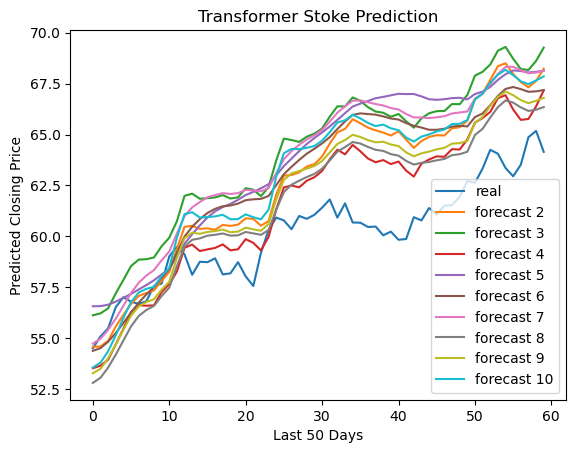

In [20]:
plt.plot(y_test, label='real')
for i in range(1,10):
    plt.plot(predict0[i], label='forecast %d'%(i + 1))
plt.title('Transformer Stoke Prediction')
plt.xlabel('Last 50 Days')
plt.ylabel('Predicted Closing Price')
plt.legend()
plt.show()

In [21]:
print(mse)
print(acc)

[55.38303898985812, 9.72319469686434, 17.219993772010348, 4.7355931311937125, 16.152688002433813, 11.13747626080231, 15.370148413604463, 5.416662334672369, 6.830729441790946, 11.315562471118254]
[0.8774563531051481, 0.949053040618028, 0.9318937272206794, 0.9642818416388573, 0.933962555814071, 0.9450179231730428, 0.9355436923132847, 0.9615130835960102, 0.9570041788967473, 0.9448522941450301]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


/Users/wangxinyu/Documents/Msc(AI)_Courses/COMP7409/COMP7409_2025_Project/transformer.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['roc'] = ta.momentum.roc(close=df.close) # Rate of Change (ROC)
/Users/wangxinyu/Documents/Msc(AI)_Courses/COMP7409/COMP7409_2025_Project/transformer.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rsi'] = ta.momentum.rsi(close=df.close) # Relative Strength Index (RSI)
/Users/wangxinyu/Documents/Msc(AI)_Courses/COMP7409/COMP7409_2025_Project/transformer.py:30

array([[0.6564233]], dtype=float32)

In [3]:
import itertools

# 生成 4 位二进制数的所有组合
binary_combinations = list(itertools.product('01', repeat=4))

In [9]:
for combination in binary_combinations:
    combination = ''.join(combination)
    df_na  = get_data(symbol='106.TTE', start_date='20210101', end_date="20250330", model_num=combination)
    scaler = MinMaxScaler()
    x_values = scaler.fit_transform(df_na.values)

    TIMESTEP = 32
    y_values = x_values[:,0]
    x_values = x_values[:,1:]


    def create_time_series_data(X, time_steps):
        X_t = []
        for i in range(len(X) - time_steps):
            X_t.append(X[i:i + time_steps])  # 时间步数据
            
        return np.array(X_t)

    x_values = create_time_series_data(x_values , TIMESTEP)

    X_train = x_values[:-60]
    X_test = x_values[-60:]
    y_train = y_values[TIMESTEP:-60]
    y_test = y_values[-60:]

    # 创建模型
    input_shape = (TIMESTEP, X_train.shape[-1])  # 时间步和特征数
    model = create_model(input_shape)
    # 训练模型
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=30, batch_size=32)
    model.save("attention_model/attention_"+combination+".keras")

Epoch 1/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 37.6665
Epoch 2/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.1175
Epoch 3/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0710
Epoch 4/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0689
Epoch 5/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0809
Epoch 6/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0936
Epoch 7/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0746
Epoch 8/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0849
Epoch 9/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0795
Epoch 10/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0976
Epoch 11/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0718
Epoch 12/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.2830
Epoch 13/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0704
Epoch 14/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0608
Epoch 15/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0673
Epo

/Users/wangxinyu/Documents/Msc(AI)_Courses/COMP7409/COMP7409_2025_Project/utils.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['obv'] = ta.volume.on_balance_volume(close=df.close, volume=df.volume) # On Balance Volume (OBV)
/Users/wangxinyu/Documents/Msc(AI)_Courses/COMP7409/COMP7409_2025_Project/utils.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vpt'] = ta.volume.volume_price_trend(close=df.close, volume=df.volume) # Volume-price trend (VPT)
/Users/wangxinyu/Documents/Msc(AI)_Courses/C

30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 48.1527
Epoch 2/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0987
Epoch 3/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0609
Epoch 4/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0532
Epoch 5/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0483
Epoch 6/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.1293
Epoch 7/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0335
Epoch 8/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0192
Epoch 9/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0131
Epoch 10/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0110
Epoch 11/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0152
Epoch 12/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0207
Epoch 13/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0094
Epoch 14/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0102
Epoch 15/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0092
Epoch 16/30
30

/Users/wangxinyu/Documents/Msc(AI)_Courses/COMP7409/COMP7409_2025_Project/utils.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['aroon_down'] = aroon_indicator.aroon_down() # Aroon Down Channel
/Users/wangxinyu/Documents/Msc(AI)_Courses/COMP7409/COMP7409_2025_Project/utils.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['aroon'] = aroon_indicator.aroon_indicator() # Aroon Indicator
/Users/wangxinyu/Documents/Msc(AI)_Courses/COMP7409/COMP7409_2025_Project/utils.py:42: SettingWithCopyWarning: 

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 34.6393
Epoch 2/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0836
Epoch 3/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0318
Epoch 4/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0616
Epoch 5/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.3157
Epoch 6/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0614
Epoch 7/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0079
Epoch 8/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0064
Epoch 9/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0050
Epoch 10/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0048
Epoch 11/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0041
Epoch 12/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0049
Epoch 13/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0048
Epoch 14/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0067
Epoch 15/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0041
Epoch 16/30
29

/Users/wangxinyu/Documents/Msc(AI)_Courses/COMP7409/COMP7409_2025_Project/utils.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['aroon_down'] = aroon_indicator.aroon_down() # Aroon Down Channel
/Users/wangxinyu/Documents/Msc(AI)_Courses/COMP7409/COMP7409_2025_Project/utils.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['aroon'] = aroon_indicator.aroon_indicator() # Aroon Indicator
/Users/wangxinyu/Documents/Msc(AI)_Courses/COMP7409/COMP7409_2025_Project/utils.py:42: SettingWithCopyWarning: 

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 62.5233
Epoch 2/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0701
Epoch 3/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0590
Epoch 4/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0542
Epoch 5/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0318
Epoch 6/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0121
Epoch 7/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0087
Epoch 8/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0067
Epoch 9/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0044
Epoch 10/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0044
Epoch 11/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0409
Epoch 12/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0046
Epoch 13/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0033
Epoch 14/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0029
Epoch 15/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0030
Epoch 16/30
29

/Users/wangxinyu/Documents/Msc(AI)_Courses/COMP7409/COMP7409_2025_Project/utils.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bb_bbhi'] = bb_indicator.bollinger_hband_indicator() # Bollinger Band high indicator
/Users/wangxinyu/Documents/Msc(AI)_Courses/COMP7409/COMP7409_2025_Project/utils.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bb_bbli'] = bb_indicator.bollinger_lband_indicator() # Bollinger Band low indicator


31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 45.8287
Epoch 2/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1351
Epoch 3/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1005
Epoch 4/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1068
Epoch 5/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0783
Epoch 6/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0688
Epoch 7/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0813
Epoch 8/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0869
Epoch 9/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0807
Epoch 10/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0637
Epoch 11/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0731
Epoch 12/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0703
Epoch 13/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0665
Epoch 14/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0827
Epoch 15/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0999
Epoch 16/30
31

/Users/wangxinyu/Documents/Msc(AI)_Courses/COMP7409/COMP7409_2025_Project/utils.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bb_bbhi'] = bb_indicator.bollinger_hband_indicator() # Bollinger Band high indicator
/Users/wangxinyu/Documents/Msc(AI)_Courses/COMP7409/COMP7409_2025_Project/utils.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bb_bbli'] = bb_indicator.bollinger_lband_indicator() # Bollinger Band low indicator
/Users/wangxinyu/Documents/Msc(AI)_Courses/COMP7409/COMP7409_2025_Pro

30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 61.0581
Epoch 2/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0811
Epoch 3/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0622
Epoch 4/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0774
Epoch 5/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0597
Epoch 6/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0263
Epoch 7/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0283
Epoch 8/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0175
Epoch 9/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0136
Epoch 10/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0118
Epoch 11/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0100
Epoch 12/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0156
Epoch 13/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0185
Epoch 14/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0136
Epoch 15/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0130
Epoch 16/30
30

/Users/wangxinyu/Documents/Msc(AI)_Courses/COMP7409/COMP7409_2025_Project/utils.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bb_bbhi'] = bb_indicator.bollinger_hband_indicator() # Bollinger Band high indicator
/Users/wangxinyu/Documents/Msc(AI)_Courses/COMP7409/COMP7409_2025_Project/utils.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bb_bbli'] = bb_indicator.bollinger_lband_indicator() # Bollinger Band low indicator
/Users/wangxinyu/Documents/Msc(AI)_Courses/COMP7409/COMP7409_2025_Pro

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 54.1688
Epoch 2/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1089
Epoch 3/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0495
Epoch 4/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0209
Epoch 5/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0122
Epoch 6/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0076
Epoch 7/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0061
Epoch 8/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0082
Epoch 9/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0077
Epoch 10/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0075
Epoch 11/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0037
Epoch 12/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0040
Epoch 13/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0037
Epoch 14/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0039
Epoch 15/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0056
Epoch 16/30
29

/Users/wangxinyu/Documents/Msc(AI)_Courses/COMP7409/COMP7409_2025_Project/utils.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bb_bbhi'] = bb_indicator.bollinger_hband_indicator() # Bollinger Band high indicator
/Users/wangxinyu/Documents/Msc(AI)_Courses/COMP7409/COMP7409_2025_Project/utils.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bb_bbli'] = bb_indicator.bollinger_lband_indicator() # Bollinger Band low indicator
/Users/wangxinyu/Documents/Msc(AI)_Courses/COMP7409/COMP7409_2025_Pro

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 77.4857
Epoch 2/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.1294
Epoch 3/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0867
Epoch 4/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0319
Epoch 5/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0158
Epoch 6/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0105
Epoch 7/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0111
Epoch 8/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0071
Epoch 9/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0057
Epoch 10/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0046
Epoch 11/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0055
Epoch 12/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0053
Epoch 13/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0050
Epoch 14/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0046
Epoch 15/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0126
Epoch 16/30
29

/Users/wangxinyu/Documents/Msc(AI)_Courses/COMP7409/COMP7409_2025_Project/utils.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['roc'] = ta.momentum.roc(close=df.close) # Rate of Change (ROC)
/Users/wangxinyu/Documents/Msc(AI)_Courses/COMP7409/COMP7409_2025_Project/utils.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rsi'] = ta.momentum.rsi(close=df.close) # Relative Strength Index (RSI)
/Users/wangxinyu/Documents/Msc(AI)_Courses/COMP7409/COMP7409_2025_Project/utils.py:25: SettingWithCopyW

30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 86.1446
Epoch 2/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.1299
Epoch 3/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0701
Epoch 4/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0706
Epoch 5/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0670
Epoch 6/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0909
Epoch 7/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0755
Epoch 8/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0656
Epoch 9/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0685
Epoch 10/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0645
Epoch 11/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0719
Epoch 12/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1080
Epoch 13/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.4902
Epoch 14/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0754
Epoch 15/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0617
Epoch 16/30
30

/Users/wangxinyu/Documents/Msc(AI)_Courses/COMP7409/COMP7409_2025_Project/utils.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['roc'] = ta.momentum.roc(close=df.close) # Rate of Change (ROC)
/Users/wangxinyu/Documents/Msc(AI)_Courses/COMP7409/COMP7409_2025_Project/utils.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rsi'] = ta.momentum.rsi(close=df.close) # Relative Strength Index (RSI)
/Users/wangxinyu/Documents/Msc(AI)_Courses/COMP7409/COMP7409_2025_Project/utils.py:25: SettingWithCopyW

30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 27.7657
Epoch 2/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0854
Epoch 3/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.1011
Epoch 4/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0952
Epoch 5/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0573
Epoch 6/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0404
Epoch 7/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0176
Epoch 8/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0204
Epoch 9/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0144
Epoch 10/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0088
Epoch 11/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0080
Epoch 12/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0082
Epoch 13/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0068
Epoch 14/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0076
Epoch 15/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0124
Epoch 16/30
30

/Users/wangxinyu/Documents/Msc(AI)_Courses/COMP7409/COMP7409_2025_Project/utils.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['roc'] = ta.momentum.roc(close=df.close) # Rate of Change (ROC)
/Users/wangxinyu/Documents/Msc(AI)_Courses/COMP7409/COMP7409_2025_Project/utils.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rsi'] = ta.momentum.rsi(close=df.close) # Relative Strength Index (RSI)
/Users/wangxinyu/Documents/Msc(AI)_Courses/COMP7409/COMP7409_2025_Project/utils.py:25: SettingWithCopyW

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 63.2994
Epoch 2/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0545
Epoch 3/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0250
Epoch 4/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0149
Epoch 5/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0164
Epoch 6/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0057
Epoch 7/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0087
Epoch 8/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0060
Epoch 9/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0054
Epoch 10/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0058
Epoch 11/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0063
Epoch 12/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0044
Epoch 13/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0036
Epoch 14/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0050
Epoch 15/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0043
Epoch 16/30
29

/Users/wangxinyu/Documents/Msc(AI)_Courses/COMP7409/COMP7409_2025_Project/utils.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['roc'] = ta.momentum.roc(close=df.close) # Rate of Change (ROC)
/Users/wangxinyu/Documents/Msc(AI)_Courses/COMP7409/COMP7409_2025_Project/utils.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rsi'] = ta.momentum.rsi(close=df.close) # Relative Strength Index (RSI)
/Users/wangxinyu/Documents/Msc(AI)_Courses/COMP7409/COMP7409_2025_Project/utils.py:25: SettingWithCopyW

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 71.6321
Epoch 2/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0898
Epoch 3/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0119
Epoch 4/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0133
Epoch 5/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0057
Epoch 6/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0058
Epoch 7/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0058
Epoch 8/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0043
Epoch 9/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0052
Epoch 10/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0055
Epoch 11/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0096
Epoch 12/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0069
Epoch 13/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0052
Epoch 14/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0039
Epoch 15/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0079
Epoch 16/30
29

/Users/wangxinyu/Documents/Msc(AI)_Courses/COMP7409/COMP7409_2025_Project/utils.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['roc'] = ta.momentum.roc(close=df.close) # Rate of Change (ROC)
/Users/wangxinyu/Documents/Msc(AI)_Courses/COMP7409/COMP7409_2025_Project/utils.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rsi'] = ta.momentum.rsi(close=df.close) # Relative Strength Index (RSI)
/Users/wangxinyu/Documents/Msc(AI)_Courses/COMP7409/COMP7409_2025_Project/utils.py:25: SettingWithCopyW

30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 25.8500
Epoch 2/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0860
Epoch 3/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0946
Epoch 4/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1528
Epoch 5/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0969
Epoch 6/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2267
Epoch 7/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1059
Epoch 8/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1299
Epoch 9/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.1129
Epoch 10/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0756
Epoch 11/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0652
Epoch 12/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0698
Epoch 13/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0744
Epoch 14/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0700
Epoch 15/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0900
Epoch 16/30
30

/Users/wangxinyu/Documents/Msc(AI)_Courses/COMP7409/COMP7409_2025_Project/utils.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['roc'] = ta.momentum.roc(close=df.close) # Rate of Change (ROC)
/Users/wangxinyu/Documents/Msc(AI)_Courses/COMP7409/COMP7409_2025_Project/utils.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rsi'] = ta.momentum.rsi(close=df.close) # Relative Strength Index (RSI)
/Users/wangxinyu/Documents/Msc(AI)_Courses/COMP7409/COMP7409_2025_Project/utils.py:25: SettingWithCopyW

30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 32.8129
Epoch 2/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1292
Epoch 3/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0778
Epoch 4/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1891
Epoch 5/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0458
Epoch 6/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0400
Epoch 7/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0260
Epoch 8/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0272
Epoch 9/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0252
Epoch 10/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0096
Epoch 11/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0081
Epoch 12/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0102
Epoch 13/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0066
Epoch 14/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0071
Epoch 15/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0070
Epoch 16/30
30

/Users/wangxinyu/Documents/Msc(AI)_Courses/COMP7409/COMP7409_2025_Project/utils.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['roc'] = ta.momentum.roc(close=df.close) # Rate of Change (ROC)
/Users/wangxinyu/Documents/Msc(AI)_Courses/COMP7409/COMP7409_2025_Project/utils.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rsi'] = ta.momentum.rsi(close=df.close) # Relative Strength Index (RSI)
/Users/wangxinyu/Documents/Msc(AI)_Courses/COMP7409/COMP7409_2025_Project/utils.py:25: SettingWithCopyW

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 47.2039
Epoch 2/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.1237
Epoch 3/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0487
Epoch 4/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0331
Epoch 5/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0217
Epoch 6/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0090
Epoch 7/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0081
Epoch 8/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0086
Epoch 9/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0048
Epoch 10/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0034
Epoch 11/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0033
Epoch 12/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0034
Epoch 13/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0038
Epoch 14/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0032
Epoch 15/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0034
Epoch 16/30
29

/Users/wangxinyu/Documents/Msc(AI)_Courses/COMP7409/COMP7409_2025_Project/utils.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['roc'] = ta.momentum.roc(close=df.close) # Rate of Change (ROC)
/Users/wangxinyu/Documents/Msc(AI)_Courses/COMP7409/COMP7409_2025_Project/utils.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rsi'] = ta.momentum.rsi(close=df.close) # Relative Strength Index (RSI)
/Users/wangxinyu/Documents/Msc(AI)_Courses/COMP7409/COMP7409_2025_Project/utils.py:25: SettingWithCopyW

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 83.3399
Epoch 2/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0577
Epoch 3/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0254
Epoch 4/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0121
Epoch 5/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0097
Epoch 6/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0048
Epoch 7/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0052
Epoch 8/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0060
Epoch 9/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0080
Epoch 10/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0075
Epoch 11/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0035
Epoch 12/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0047
Epoch 13/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0913
Epoch 14/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.8261
Epoch 15/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0971
Epoch 16/30
29